In [13]:
import pandas as pd
import numpy as np
import pytorch_forecasting as ptf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

In [4]:
seasonal_file = 'SPCS20RSA.xlsx'
nonseasonal_file = 'SPCS20RNSA.xlsx'
seasonal_df = pd.read_excel(seasonal_file, sheet_name='Monthly', index_col=0, parse_dates=True)
nonseasonal_df = pd.read_excel(nonseasonal_file, sheet_name='Monthly', index_col=0, parse_dates=True)

In [5]:
seasonal_df['Seasonal Growth Rates'] = np.log(seasonal_df['SPCS20RSA']).diff()
nonseasonal_df['Not Seasonal Growth Rates'] = np.log(nonseasonal_df['SPCS20RNSA']).diff()
seasonal_df = seasonal_df.dropna()
nonseasonal_df = nonseasonal_df.dropna()

In [6]:
seasonal_df

,SPCS20RSA,Seasonal Growth Rates
observation_date,,
2000-02-01,101.692479,0.010904
2000-03-01,102.783828,0.010675
2000-04-01,103.996444,0.011729
2000-05-01,105.252818,0.012009
2000-06-01,106.402524,0.010864
...,...,...
2025-06-01,336.914658,-0.001851
2025-07-01,336.800201,-0.000340
2025-08-01,337.327089,0.001563


Non-seasonally Adjusted Data 48 Lags

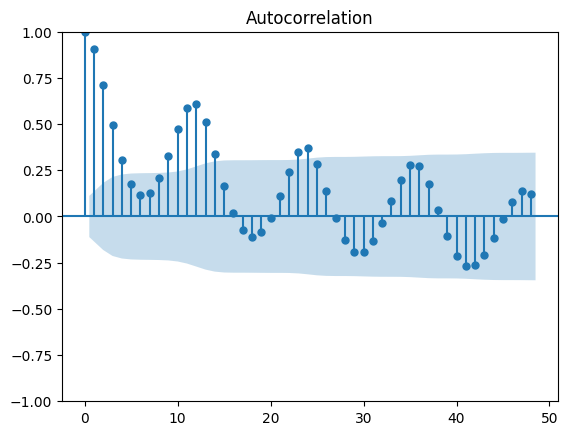

In [7]:
nonseasonalacf = plot_acf(nonseasonal_df['Not Seasonal Growth Rates'], lags=48)

AR[1] Non-seasonally Adjusted Model

In [8]:
nonseasonalar1model = AutoReg(nonseasonal_df['Not Seasonal Growth Rates'], lags=1).fit()
print(nonseasonalar1model.summary())

                                AutoReg Model Results                                
Dep. Variable:     Not Seasonal Growth Rates   No. Observations:                  309
Model:                            AutoReg(1)   Log Likelihood                1260.451
Method:                      Conditional MLE   S.D. of innovations              0.004
Date:                       Wed, 14 Jan 2026   AIC                          -2514.901
Time:                               11:33:38   BIC                          -2503.711
Sample:                           03-01-2000   HQIC                         -2510.427
                                - 10-01-2025                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0003      0.000      1.291      0.197      -0.000       0.001
Not Seasonal Growth R

/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Seasonal Data 48 Lags

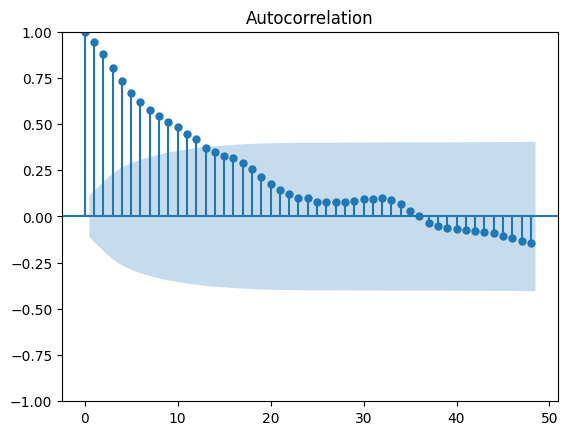

In [9]:
seasonal_acf = plot_acf(seasonal_df['Seasonal Growth Rates'], lags=48)

AR[1] Seasonally Adjusted Model

In [19]:
nonseasonalar1model = AutoReg(nonseasonal_df['Not Seasonal Growth Rates'], lags=1).fit()
print(nonseasonalar1model.summary())

                                AutoReg Model Results                                
Dep. Variable:     Not Seasonal Growth Rates   No. Observations:                  309
Model:                            AutoReg(1)   Log Likelihood                1260.451
Method:                      Conditional MLE   S.D. of innovations              0.004
Date:                       Wed, 14 Jan 2026   AIC                          -2514.901
Time:                               11:53:39   BIC                          -2503.711
Sample:                           03-01-2000   HQIC                         -2510.427
                                - 10-01-2025                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0003      0.000      1.291      0.197      -0.000       0.001
Not Seasonal Growth R

/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


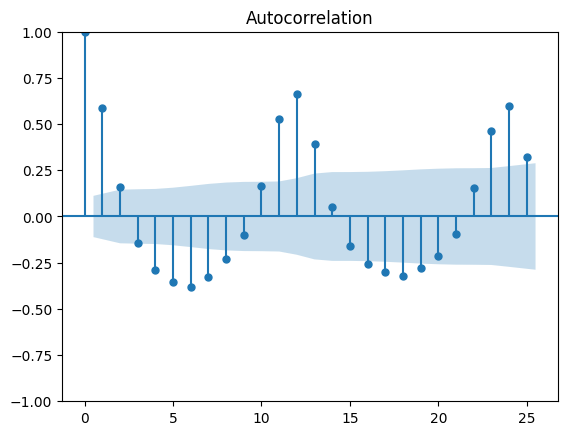

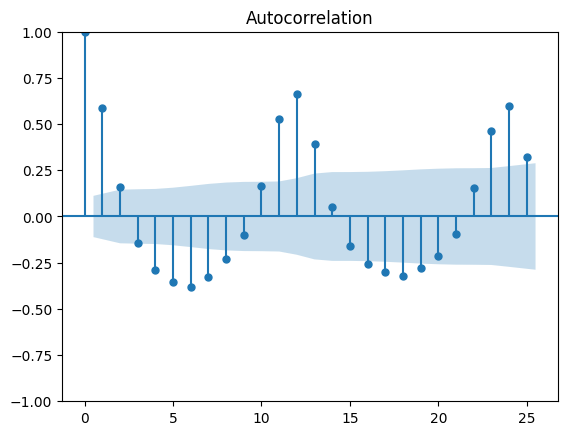

In [23]:
plot_acf(nonseasonalar1model.resid)

PACF to find better fitting AR(p) model

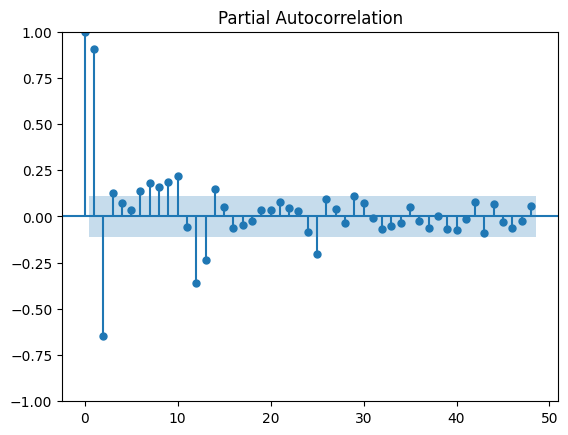

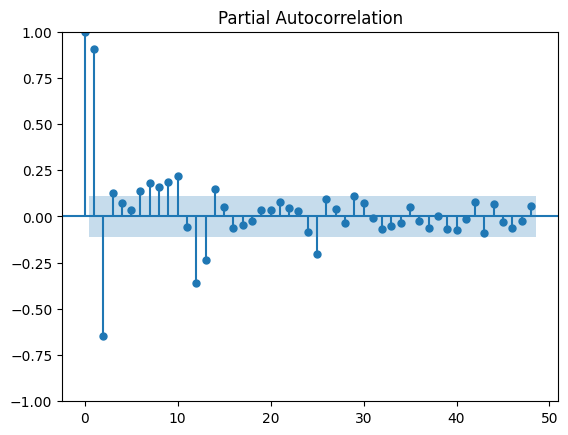

In [29]:
plot_pacf(nonseasonal_df['Not Seasonal Growth Rates'], lags=48)


In [30]:
nonseasonalar14model = AutoReg(nonseasonal_df['Not Seasonal Growth Rates'], lags=14).fit()
print(nonseasonalar14model.summary())

                                AutoReg Model Results                                
Dep. Variable:     Not Seasonal Growth Rates   No. Observations:                  309
Model:                           AutoReg(14)   Log Likelihood                1347.887
Method:                      Conditional MLE   S.D. of innovations              0.003
Date:                       Wed, 14 Jan 2026   AIC                          -2663.773
Time:                               12:05:36   BIC                          -2604.781
Sample:                           04-01-2001   HQIC                         -2640.151
                                - 10-01-2025                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0002      0.000      1.369      0.171     -0.0001       0.001
Not Seasonal Growt

/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


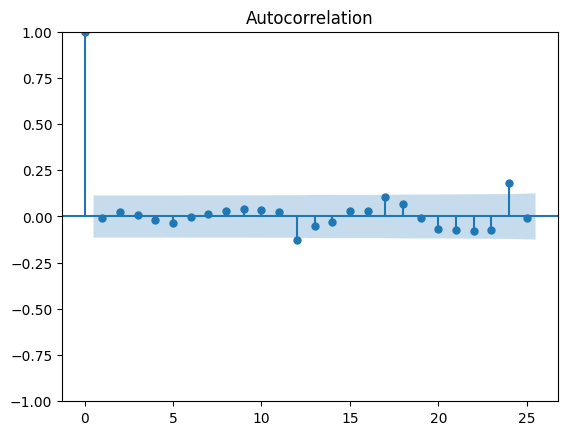

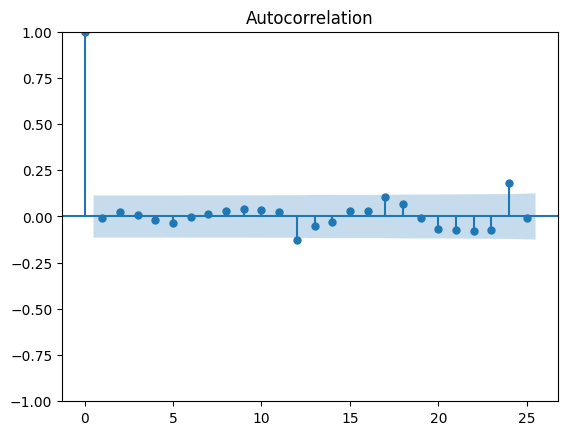

In [27]:
plot_acf(nonseasonalar14model.resid)

Nonseasonal forecasts compared to real data

In [34]:
nonseasonal_forecast = nonseasonalar14model.predict()
results = pd.DataFrame(
    {
        'Actual': nonseasonal_df['Not Seasonal Growth Rates'],
        'Forecast': nonseasonal_forecast
    }
)

<Axes: >

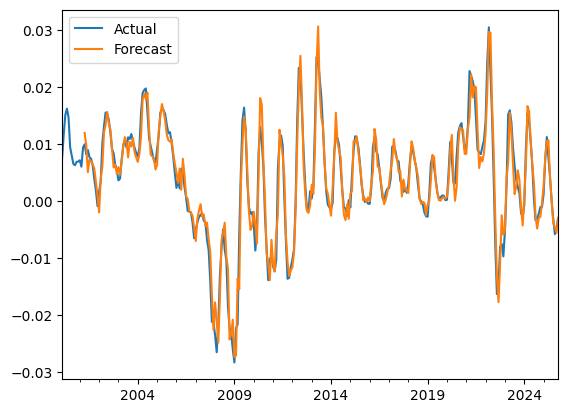

In [36]:
results.plot()

One step ahead out of sample forecast and prediction interval

In [59]:
onestepahead = nonseasonalar14model.forecast(steps=1)

/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [57]:
intervals = nonseasonalar14model.conf_int(alpha=0.05)

In [55]:
intervals

,0,1
const,-0.000100,0.000563
Not Seasonal Growth Rates.L1,1.255076,1.480429
Not Seasonal Growth Rates.L2,-0.640650,-0.270514
Not Seasonal Growth Rates.L3,-0.270977,0.112967
Not Seasonal Growth Rates.L4,-0.119107,0.257606
Not Seasonal Growth Rates.L5,-0.171917,0.205104
Not Seasonal Growth Rates.L6,-0.263432,0.112641
Not Seasonal Growth Rates.L7,-0.153629,0.223396
Not Seasonal Growth Rates.L8,-0.117652,0.260240
Not Seasonal Growth Rates.L9,-0.328799,0.048047


Consider the first order model: Yt = 0.1 + 0.99Yt-1 + et where et is iidN(0,0.5^2)